In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [29]:
df = pd.read_csv("20230802_Matrícula_Ed_Superior_2023_PUBL_MRUN.csv", delimiter=";")
df.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_16404\880468899.py:1: DtypeWarning: Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("20230802_Matrícula_Ed_Superior_2023_PUBL_MRUN.csv", delimiter=";")


,cat_periodo,id,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,tipo_inst_1,tipo_inst_2,tipo_inst_3,cod_inst,nomb_inst,cod_sede,nomb_sede,cod_carrera,nomb_carrera,modalidad,jornada,version,tipo_plan_carr,dur_estudio_carr,dur_proceso_tit,dur_total_carr,region_sede,provincia_sede,comuna_sede,nivel_global,nivel_carrera_1,nivel_carrera_2,requisito_ingreso,vigencia_carrera,formato_valores,valor_matricula,valor_arancel,codigo_demre,area_conocimiento,cine_f_97_area,cine_f_97_subarea,area_carrera_generica,cine_f_13_area,cine_f_13_subarea,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
0,2023,927537,I111S2C48J2V1,25.0,1,200212,20 a 24 años,2023,1,2023,1,Institutos Profesionales,Institutos Profesionales,Institutos Profesionales,111,IP DUOC UC,2,SEDE VALPARAISO,48,INGENIERIA EN INFORMATICA,Presencial,Vespertino,1,Plan Regular,8,1,8,Valparaíso,VALPARAISO,VALPARAISO,Pregrado,Profesional Sin Licenciatura,Carreras Profesionales,Educación Media,Vigente con Alumnos Nuevos,Monto en Pesos,258000,2870000,NaN,Tecnología,Ciencias,Informática,Ingeniería en Computación e Informática,Tecnología de la Información y la Comunicación...,Tecnología de la Información y la Comunicación...,NO ACREDITADA,ACREDITADA,26/08/2017 AL 26/08/2024,7.0,0,0,1- Ingreso Directo (regular)
1,2023,927464,I45S2C4J1V1,26.0,2,200212,20 a 24 años,2022,1,2022,1,Universidades,Universidades Privadas,Universidades Privadas,45,UNIVERSIDAD DEL DESARROLLO,2,SEDE SANTIAGO (LAS CONDES),4,DERECHO,Presencial,Diurno,1,Plan Regular,10,2,12,Metropolitana,SANTIAGO,LAS CONDES,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,Educación Media,Vigente con Alumnos Nuevos,Monto en UF,25,232,44006.0,Derecho,"Ciencias Sociales, Enseñanza Comercial y Derecho",Derecho,Derecho,Administración de Empresas y Derecho,Derecho,NO ACREDITADA,ACREDITADA,16/12/2021 AL 16/12/2027,6.0,0,0,1- Ingreso Directo (regular)
2,2023,362242,I31S2C41J1V1,35.0,1,199711,25 a 29 años,2017,1,2017,1,Universidades,Universidades Privadas,Universidades Privadas,31,UNIVERSIDAD AUTONOMA DE CHILE,2,SEDE TALCA,41,ENFERMERIA,Presencial,Diurno,1,Plan Regular,10,1,10,Maule,TALCA,TALCA,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,Educación Media,Vigente con Alumnos Nuevos,Monto en Pesos,289000,4454000,49201.0,Salud,Salud y Servicios Sociales,Medicina,Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,29/10/2019 AL 29/10/2024,5.0,244970,70000,1- Ingreso Directo (regular)
3,2023,1330048,I70S1C900J1V1,43.0,2,199007,30 a 34 años,2020,1,2020,1,Universidades,Universidades CRUCH,Universidades Estatales CRUCH,70,UNIVERSIDAD DE CHILE,1,SANTIAGO,900,"DOCTORADO EN TERRITORIO, ESPACIO Y SOCIEDAD",Presencial,Diurno,1,Plan Regular,8,0,8,Metropolitana,SANTIAGO,SANTIAGO,Postgrado,Doctorado,Doctorado,Licenciatura,Vigente con Alumnos Nuevos,Monto en Pesos,177300,3668000,0.0,Ciencias Sociales,"Ciencias Sociales, Enseñanza Comercial y Derecho",Ciencias Sociales y del Comportamiento,Doctorado en Ciencias Sociales,"Ciencias Sociales, Periodismo e Información",Ciencias Sociales y del Comportamiento,NO ACREDITADA,ACREDITADA,22/12/2018 AL 22/12/2025,7.0,0,64000,1- Ingreso Directo (regular)
4,2023,81882,I143S27C34J2V1,51.0,2,198305,40 y más años,2022,1,2022,1,Institutos Profesionales,Institutos Profesionales,Institutos Profesionales,143,IP AIEP,27,SEDE SANTIAGO NORTE,34,TECNICO EN ENFERMERIA,Presencial,Vespertino,1,Plan Regular,5,1,5,Metropolitana,SANTIAGO,CONCHALI,Pregrado,Técnico de Nivel Superior,Carreras Técnicas,Educación Media,Vigente con Alumnos Nuevos,Monto en Pesos,210000,2720000,NaN,Salud,Salud y Servicios Sociales,Medicina,Técnico en Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,23/11/2022 AL 23/11/2027,5.0,816000,0,1- Ingreso Directo (regular)


In [31]:
df["matricula2"] = df.apply(lambda x: x["valor_matricula"] * 36000 if x["formato_valores"] == "Monto en UF" else x["valor_matricula"], axis=1)
df["arancel2"] = df.apply(lambda x: x["valor_arancel"] * 36000 if x["formato_valores"] == "Monto en UF" else x["valor_arancel"], axis=1)
df["fn"] = df["fec_nac_alu"].astype(str).apply(lambda x: x[4:6] + "-14-" + x[0:4])
df["fn"] = pd.to_datetime(df["fn"])

(array([1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

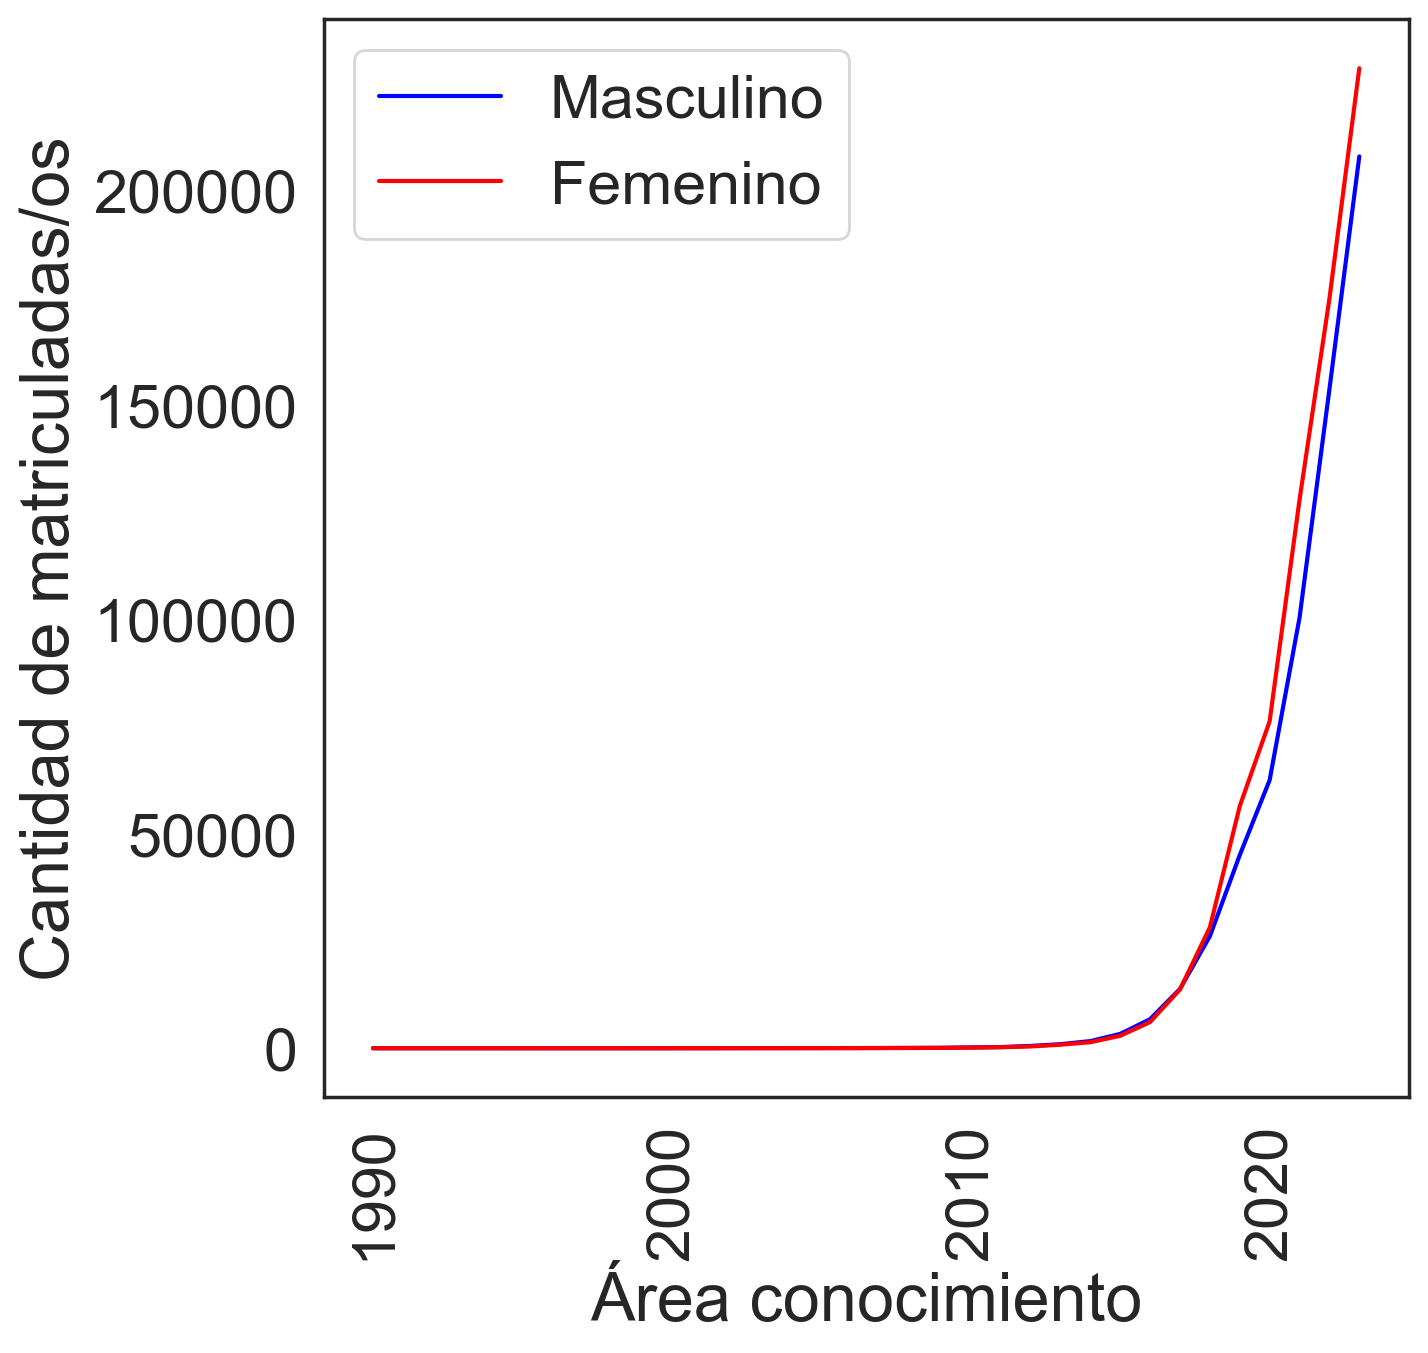

In [32]:
sns.set(font_scale=2, style="white")

fig, ax = plt.subplots(figsize=(7, 7), dpi=200)
dt = df.groupby(["gen_alu", "anio_ing_carr_act"]).agg({"id": "count"}).reset_index()
dt["gen_alu"] = dt["gen_alu"].replace({1: "Masculino", 2: "Femenino"})
sns.lineplot(y="id", x="anio_ing_carr_act", palette=["blue", "red"], hue="gen_alu", data=dt)
ax.set_xlabel("Área conocimiento")
ax.set_ylabel("Cantidad de matriculadas/os")
ax.legend(title="")
plt.xticks(rotation=90)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'DOCTORADO EN DERECHO PRIVADO'),
  Text(1, 0, 'DOCTORADO EN ADMINISTRACION'),
  Text(2, 0, 'DOCTORADO EN ENERGIAS'),
  Text(3, 0, 'DOCTORADO EN PSICOLOGIA'),
  Text(4, 0, 'DOCTORADO EN CIENCIAS CON MENCION EN QUIMICA'),
  Text(5, 0, 'DOCTORADO EN INGENIERIA METALURGICA'),
  Text(6, 0, 'DOCTORADO EN CIENCIAS Y TECNOLOGIA ANALITICA'),
  Text(7, 0, 'DOCTORADO EN CIENCIAS FISICAS'),
  Text(8, 0, 'DOCTORADO EN CIENCIAS DE LA INGENIERIA CON MENCION EN INGENIERIA QUIMICA'),
  Text(9, 0, 'DOCTORADO EN CIENCIAS DE LA INGENIERIA CON MENCION EN INGENIERIA ELECTRICA')])

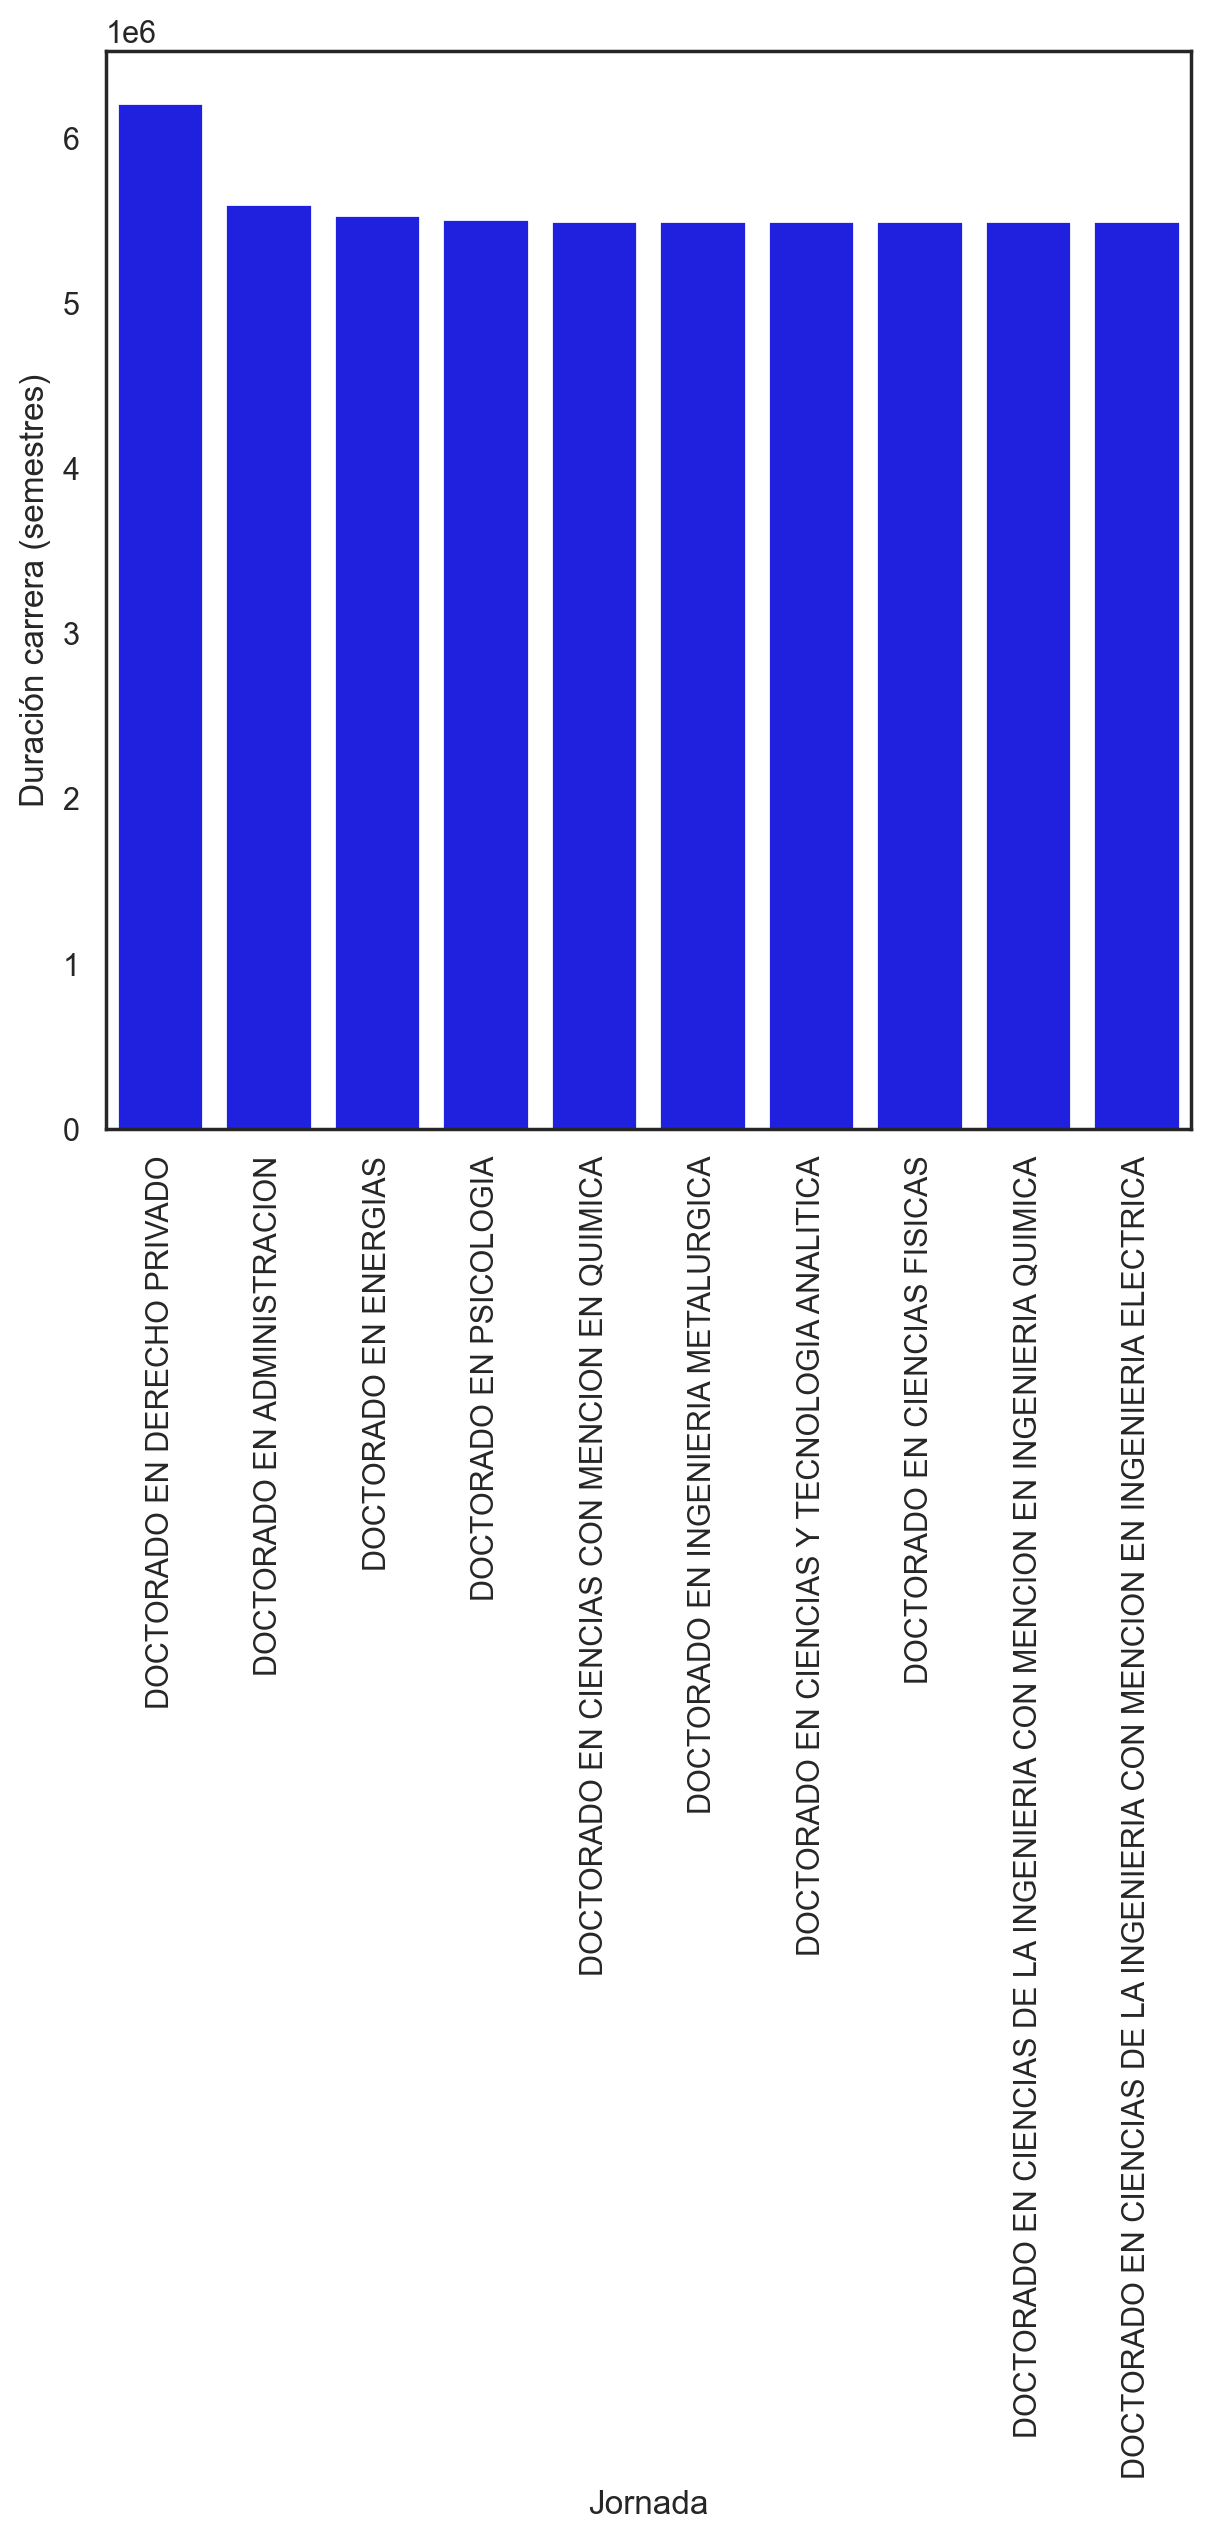

In [43]:
sns.set(font_scale=1, style="white")

fig, ax = plt.subplots(figsize=(7, 7), dpi=200)

dt = df[(df["nivel_carrera_2"] == "Doctorado") & (df["comuna_sede"] == "CONCEPCION")].groupby("nomb_carrera").agg({"arancel2": "mean"}).reset_index()
dt = dt.sort_values("arancel2", ascending=False).head(10)
sns.barplot(x="nomb_carrera", y="arancel2", color="blue",
    data=dt)
ax.set_xlabel("Jornada")
ax.set_ylabel("Duración carrera (semestres)")
plt.xticks(rotation=90)
